# Trying another clustering method

In this lesson you learned about K-Means clustering. Sometimes K-Means is not appropriate for your data. Create a notebook using data either from these lessons or from somewhere else (credit your source) and show a different clustering method NOT using K-Means. What did you learn?



## Trying hierarchical clustering

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Perform Ward's linkage



I use the linkage function from scipy.cluster.hierarchy to compute the linkage matrix based on Ward's method and then plot the dendrogram using dendrogram function from the same module

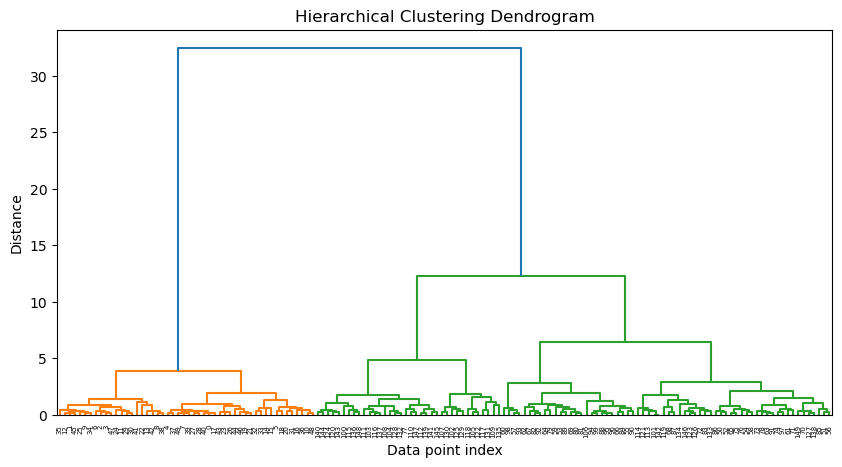

In [6]:
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()



After visualizing the dendrogram, I determine the number of clusters we want to obtain,  setting n_clusters to 3 and using the AgglomerativeClustering class from Scikit-learn to perform hierarchical clustering with the specified number of clusters. Finally, I print the cluster labels assigned to each data point.

In [8]:
# Apply clustering algorithm
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)

# Print the cluster labels
print("Cluster labels:")
print(clustering.labels_)


Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Finally the metrics

In [10]:
# Calculate the evaluation metrics
ari = metrics.adjusted_rand_score(iris.target, clustering.labels_)
silhouette = metrics.silhouette_score(X, clustering.labels_)
completeness = metrics.completeness_score(iris.target, clustering.labels_)

# Print the evaluation metrics
print("Adjusted Rand Index (ARI):", ari)
print("Silhouette Score:", silhouette)
print("Completeness Score:", completeness)



Adjusted Rand Index (ARI): 0.7311985567707746
Silhouette Score: 0.5543236611296419
Completeness Score: 0.7795958005591144


I calculated the adjusted Rand index (ARI) using the adjusted_rand_score function. 

The ARI measures the similarity between the cluster assignments and the ground truth labels, and a higher value indicates better clustering performance.

Next, I calculate the silhouette score using the silhouette_score function. The silhouette score measures the compactness and separation of the clusters, and it ranges from -1 to 1, with higher values indicating better-defined clusters.


Finally, I calculated the completeness score using the completeness_score function. The completeness score measures the extent to which all members of a true class are assigned to the same cluster, and it ranges from 0 to 1, with higher values indicating better clustering performance.

All these metrics can be used to compare different clustering models, e.g. to compare with kmeans clustering.